<a href="https://colab.research.google.com/github/Nadian-Ali/ImageClassification/blob/main/ExperimentingWitXRays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
a= 'this is a nice string'

if "dffd" in a:
  print("yeie")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd chest

/content/drive/MyDrive/chest


In [ ]:
%ls


IM-0115-0001.jpeg  IM-0127-0001.jpeg  IM-0272-0001.jpeg
IM-0117-0001.jpeg  IM-0128-0001.jpeg  IM-0312-0001.jpeg
IM-0119-0001.jpeg  IM-0129-0001.jpeg  normal/
IM-0122-0001.jpeg  IM-0131-0001.jpeg  NORMAL2-IM-0684-0001-0001.jpeg
IM-0125-0001.jpeg  IM-0133-0001.jpeg  pneumonia/


In [ ]:
import cv2

import numpy as np
import tensorflow as tf
from PIL import Image
import requests
from io import StringIO
from urllib.request import urlopen
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

<h1>Prepare image</h1>

In [ ]:
path = '/content/drive/MyDrive/chest/normal'

In [ ]:
import os
from os import listdir
from os.path import isfile, join
filenames = [f for f in listdir(path) if isfile(join(path, f))]

In [ ]:
filenames

['IM-0115-0001.jpeg',
 'IM-0119-0001.jpeg',
 'IM-0127-0001.jpeg',
 'IM-0122-0001.jpeg',
 'IM-0128-0001.jpeg',
 'IM-0125-0001.jpeg',
 'IM-0117-0001.jpeg',
 'IM-0131-0001.jpeg',
 'IM-0133-0001.jpeg',
 'IM-0129-0001.jpeg',
 'IM-0272-0001.jpeg',
 'IM-0312-0001.jpeg',
 'NORMAL2-IM-0684-0001-0001.jpeg',
 'l1.png',
 'l0.png',
 'A1.png',
 'A0.png']

In [ ]:
im_path = os.path.join(path,filenames[-4])

In [ ]:

color= cv2.IMREAD_COLOR

img = cv2.imread(im_path, 0)
image = cv2.resize(img,(256,256))

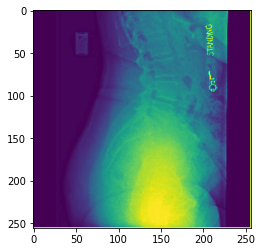

In [ ]:
image.shape
plt.imshow(image)

<h1>Explore image slices</h1>

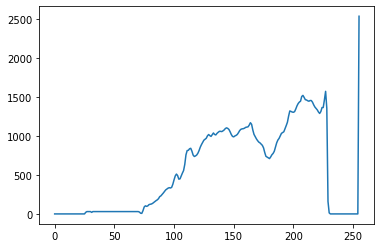

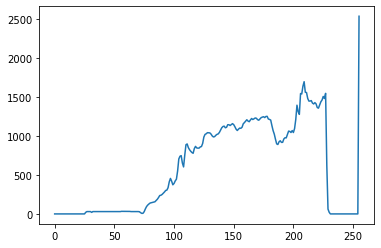

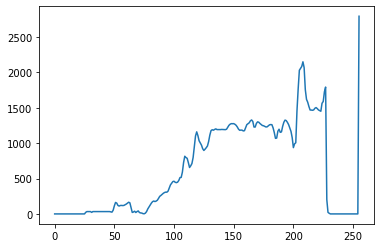

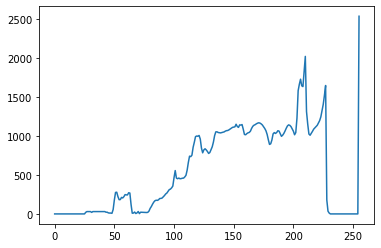

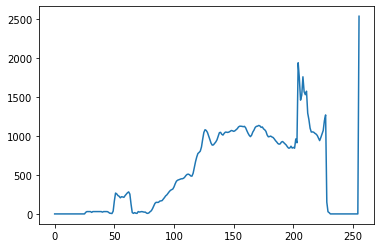

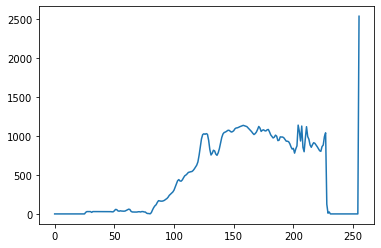

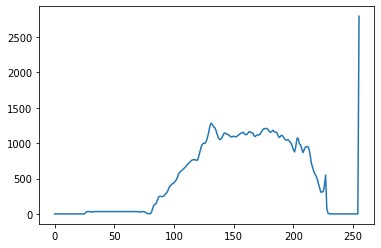

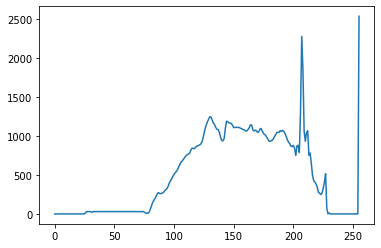

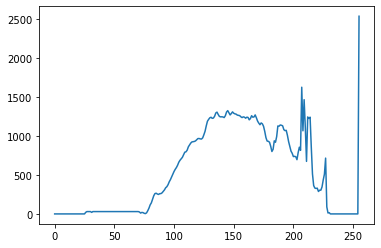

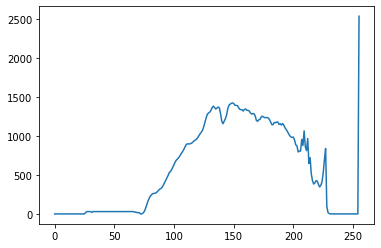

In [ ]:
for i in range(round(256/25)):
    
 # histr = cv2.calcHist([image[round((i)*256/10):round((1+i)*256/10),:]],[0],None,[256],[0,256])
  im_block = image[round((i)*256/25):round((1+i)*256/25),:]
  S = np.sum(im_block,axis= 0)
  plt.plot(S)
  plt.show()


<h1>adaptive histogram equalization</h1>

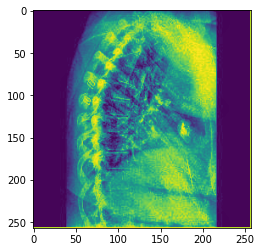

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
#cl1 = cv2.GaussianBlur(cl1, (3,3), 0)

plt.imshow(cl1)

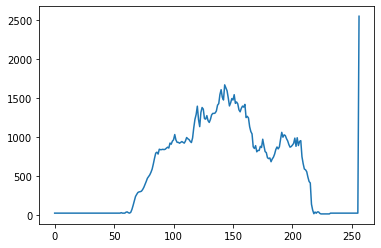

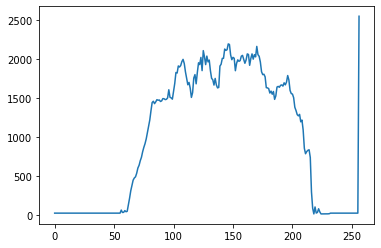

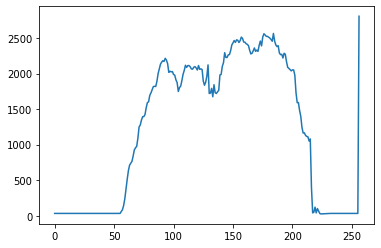

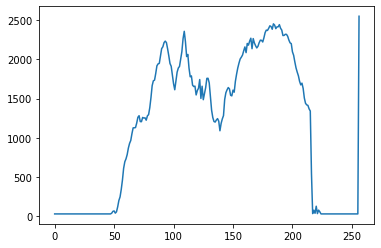

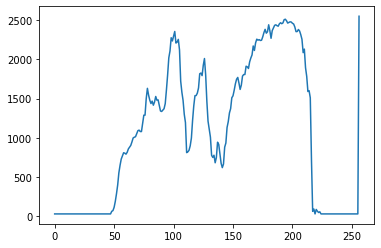

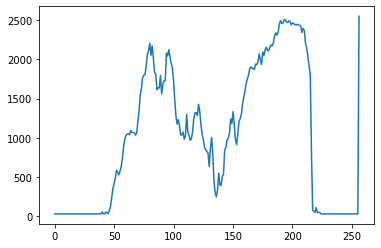

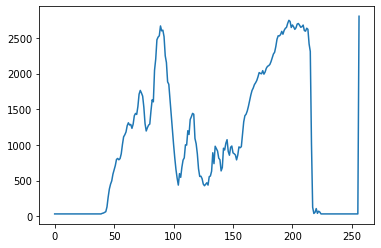

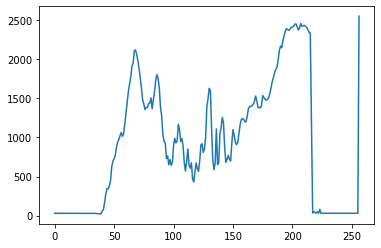

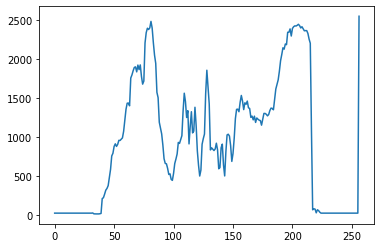

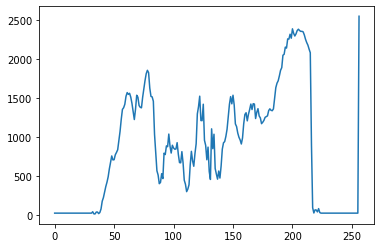

In [ ]:
for i in range(round(256/25)):
  im_block = cl1[round((i)*256/25):round((1+i)*256/25),:]
  S = np.sum(im_block,axis= 0)
  plt.plot(S)
  plt.show()


<h1>Calculate Somthing to determine symetricness</h1>

In [ ]:
a= np.array([1,2,3,4,1])
ar= np.flip(a,axis=0)
sym = a - ar
print(sym)
print(np.multiply(sym,sym))
sym = np.sqrt(np.sum(np.multiply(sym,sym)))
print(sym)

[ 0 -2  0  2  0]
[0 4 0 4 0]
2.8284271247461903


<h1>Apply Sobel mask to Gray image</h1>

In [ ]:
img_blur = cv2.GaussianBlur(cl1, (3,3), 0)


In [ ]:
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X

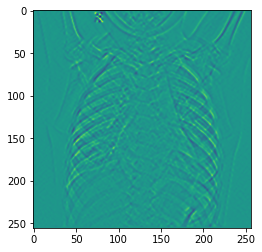

In [ ]:
plt.imshow(sobelxy)

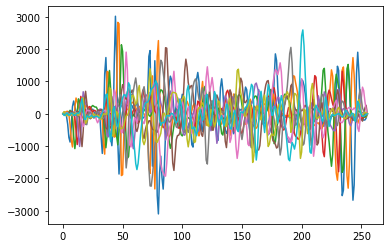

In [ ]:
for i in range(round(256/25)):
  im_block = sobelxy[round((i)*256/25):round((1+i)*256/25),:]
  S = np.sum(im_block,axis= 0)
  plt.plot(S)
#  plt.show()


In [ ]:
final = cv.normalize(img,  norm, 0, 255, cv.NORM_MINMAX)

1219.0